In [27]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [12]:
# MANIPULATE DATA
df = pd.read_csv("titanic.csv")
df.drop(columns= ["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],inplace = True)
df = pd.get_dummies(df,"Sex")
df.dropna(inplace = True)
df["Sex_female"] = df["Sex_female"].astype(int)
df["Sex_male"] = df["Sex_male"].astype(int)
df

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1
...,...,...,...,...,...,...
885,0,3,39.0,29.1250,1,0
886,0,2,27.0,13.0000,0,1
887,1,1,19.0,30.0000,1,0
889,1,1,26.0,30.0000,0,1


In [13]:
# DIVIDE FEATURES AND LABEL
X = df.drop("Survived",axis = 1)
Y = df["Survived"]

In [14]:
# LOAD Decision Tree
model = tree.DecisionTreeClassifier()

In [15]:
# SPLIT DATA
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [16]:
# FIT TRAIN DATA
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [24]:
y_pred = model.predict(X_test)

In [35]:
# R**2 (R-squared) value 
model.score(X,Y)

0.9327731092436975

In [36]:
cm = confusion_matrix(y_pred,Y_test)

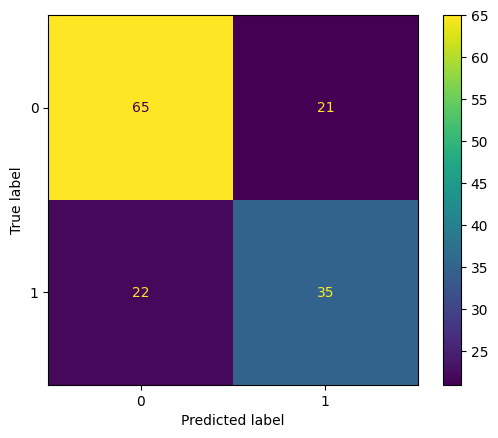

In [37]:
# CONFUSION MATRIX DISPLAY
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()